# <font color='green'>Decision Trees</font>

O algoritmo de machine learning conhecido como árvore de decisão utiliza-se de um conjunto de condições para chegar em uma decisão. Atráves de perguntas sobre as variáveis disponíveis no conjunto de dados, o algoritmo seguirá um determinado caminho dependendo se a resposta para aquela pergunta for verdadeira ou falsa.

A árvore é composta por nós e ramos. O nó inicial é chamado de nó raiz. Já os nós finais que contém a decisão são chamados de nós folhas. Os demais nós são chamados de nós internos.

O nó raiz e os nós internos contem condições que irão dividir os dados.

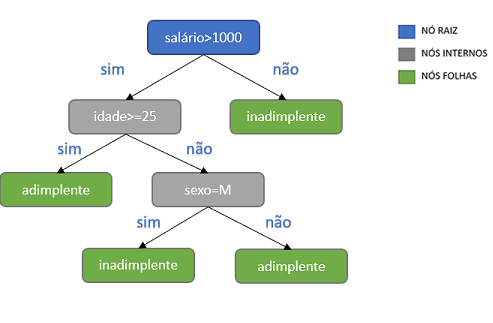

Mas por que uma árvore de decisão é considerada machine learning se é somente um conjunto de condições?

Porque precisaremos saber quais serão as condições corretas para dividir os dados. O modelo precisa aprender quais variáveis escolher e seus limites corretos para otimizar a divisão.

Uma árvore de decisão pode ser utilizada com qualquer tipo de dado, qualquer tipo de relacionamento entre as variáveis independentes e qualquer tipo de relacionamento com a variável dependente.

## Prós

1.   Pode resolver problemas não lineares;
2.   Consegue trabalhar com dados com alta dimensão com ótima acurácia;
3.   Fácil de visualizar e interpretar;

## Contras

1.   Overfitting;
2.   Uma mudança pequena nos dados pode levar a uma grande mudança na estrutura da árvore;
3.   O cálculo pode se tornar muito complexo.


## Classification Tree

Árvores de Classificaçao são utilizadas quando a decisão que desejamos obter se tratar de uma categoria.

#### Treinamento

1.   Dado um cojunto de dados de treinamento, a primeira coisa a ser feita é decidir qual variável e condição deveriam estar no nó raiz.




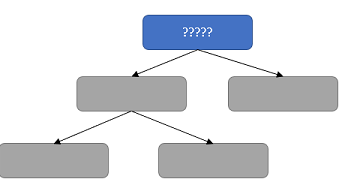

E como fazemos isso?

O algoritmo deve escolher uma das features e verificar quão bem essa feature prediz a variável target.

Para ilustrar iremos utilizar um dataset fictício para prever inadimplência onde as classes a serem preditas serão "Inadimplente" ou "Adimplente".

Digamos que a feature escolhida seja binária, por exemplo a feature "Sexo" cujo valores no dataset são masculino ou feminino. Constrói-se uma árvore somente com essa feature, e verifica-se quantas pessoas no dataset de treinamento que possuem o sexo masculino pertencem a classe "Inadimplente" e quantas pertencem a classe "Adimplente", e verifica-se o mesmo para as observações cujo valor da feature sexo seja "feminino".

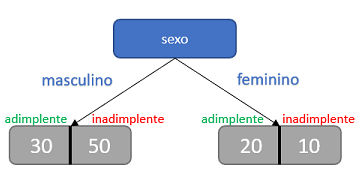

As folhas que contem observações em ambas as classes são chamadas de "Impuras", já as folhas que contém observações apenas em uma classe são chamadas de "Puras".

Essa "impureza" deve ser medida e quantificada e podemos fazer isso por diferentes métodos: Gini, Entropia e Ganho de Informação por exemplo.

##### Gini

Aqui vamos apresentar como se calcula o index Gini. 

Para esse cálculo serão necessárias algumas etapas:

1.1. Primeiro se aplica a seguinte fórmula para cada uma das folhas:

              Gini folha = 1 - ("probabilidade da classe 1 - inadimplente")² - ("probabilidade da classe 2 - adimplente")²

No nosso exemplo:

$$ Gini Sexo Masculino = 1 - ( \frac{30}{30 + 50}\ )² - ( \frac{50}{30 + 50}\ )² = 0,469 $$


$$ Gini Sexo Feminino = 1 - ( \frac{20}{20 + 10}\ )² - ( \frac{10}{20 + 10}\ )² = 0,446 $$

1.2. Após o cálculo do index gini para cada folha precisamos calcular o gini total para a feature, sendo esse a média ponderada do Gini das folhas.

                   
          Gini Total = (Total de observações da folha da esquerda/Total de observações em ambas as folhas) * Gini da folha da esquerda 
          + ( Total de observações da folha da direita/Total de observações em ambas as folhas) * Gini da folha da direita

No nosso exemplo o Gini para a feature "Sexo" será:

$$ Gini Total = ( \frac{80}{80 + 30}\ ) * 0,469 + ( \frac{30}{80 + 30}\ ) * 0,446 = 0,463 $$



1.3. Esse procedimento deve ser feito para todas as features categóricas.

Mas e quando a feature for contínua?

1.4. Calcular o index Gini para as features numéricas

 1.4.1. Para cálculo do index Gini com valores númericos, o primeiro passo é ordenar as observações conforme o valor da feature númerica. 
 
 No nosso dataset de exemplo vamos considerar a feature idade.

 1.4.2. Então calcula-se a média da idade para cada linha adjacente:



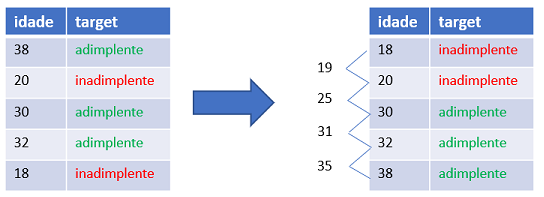

1.4.3 Cada uma das médias calculadas servirá de limite para uma árvore, onde geraremos um index Gini para cada um desses limites.
Somente para ilustrarmos consideramos na figura abaixo apenas as primeras 4 linhas do dataset, porém o cálculo é feito para todo o dataset de treinamento, e ao final é considerado o menor index gini para definição do limite.


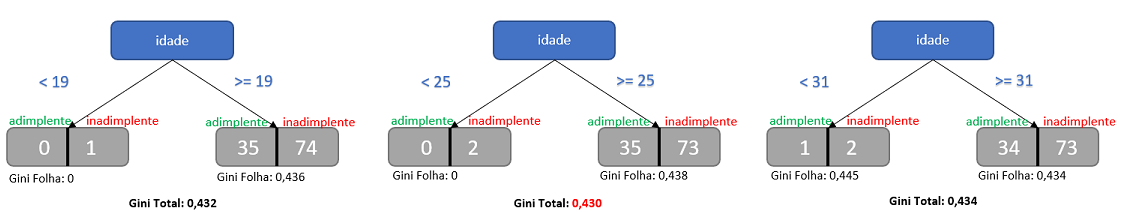

2. Após calcularmos o índice de impureza para cada uma das features,  selecionamos a feature com menor index para ser o nó raiz.

3. Agora com as observações divididas pelo primeiro nó realizaremos o mesmo cálculo de impureza para definição da hierarquia dos nós internos.

4. Definição dos nós folhas ->  Output do algoritmo:

Quando uma folha for "Puro", ou seja, somente conter observações de uma das classes, a decisão será esta classe.

Quando uma folha for "Impuro", ou seja, conter informações de ambas as classes, a decisão será pela classe com maior número de observações naquela folha.

## Regression Tree

Árvores de Regressão são utilizadas quando a decisão que desejamos obter se tratar de um valor contínuo.

Sendo assim, não poderemos utilizar as medidas de impurezas, como são utilizadas nas árvores de classificação, para encontrar a árvore que nos dará os melhores resultados, para regressão precisaremos utilizar uma medida que nos diga quanto nossas predições estão se desviando do valor real.

Nas árvores de regressão faremos a mesma coisa que para árvores de classificação porém o objetivo é tentar reduzir uma medida de erro, como o MSE por exemplo, ao invés do indice Gini;

Assim como nas árvores de classificação, com árvores de regressão podemos utilizar qualquer tipo de dado para realizar as previsões.

1. Nosso primeiro objetivo será encontrar qual feature deveremos utilizar no nó raiz.



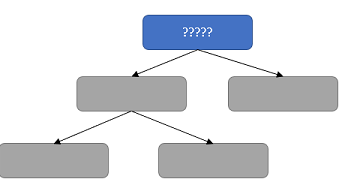

1.1 Para isso seleciona-se uma das features para ser candidata ao nó raiz.

1.1.1 Caso essa feature tenha valor contínuo:

1.1.1.1 Ordenamos os valores e então calculamos a média das 2 primeiras observações para essa variável e dividimos os dados que estão acima e abaixo dessa média.

Para exemplificar utilizaremos a variável independente m² de um dataset fictício de preços de casas:

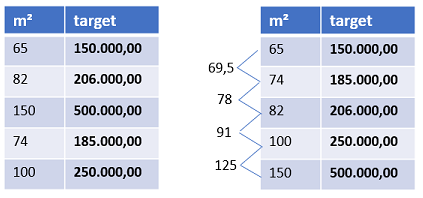

1.1.1.2 Após essa divisão calculamos a média da variável target para cada grupo. E essa média será a nossa previsão.

1.1.1.3 Então utilizamos medida de erro, por exemplo RMSE, para quantificarmos quão boa ou ruim foram as predições utilizando esse primeiro limite.

Somente para ilustração vamos supor que estamos trabalhando somente com esses dados expostos acima:

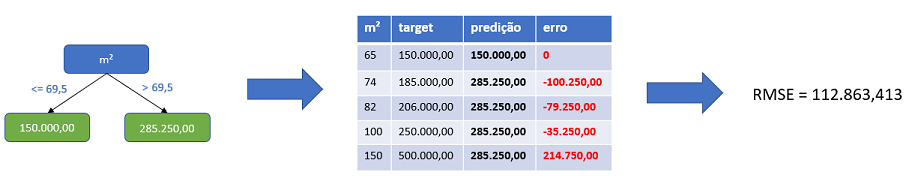

1.1.1.4 Realizaremos os mesmos passos agora selecionando a média entre a segunda e a terceira observação para ser o limite de divisão dos dados, e continuamos o processo definindo cada média das linhas adjacentes como limite e sempre calculando o erro para cada um desses limites.

1.1.1.5 Após registrarmos todos as medidas de erro para cada um dos limites, optamos pelo limite com menor erro para ser a condição de divisão dessa variável e ela passa a ser candida ao nó raiz.

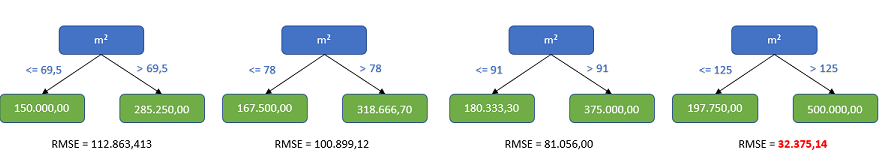

1.1.2 caso nosso dataset conter uma feature categórica

1.1.2.1 dividi-se o dataset pela categoria



1.1.2.2 calcula-se a média de cada grupo 

1.1.2.3 calcula-se então o erro

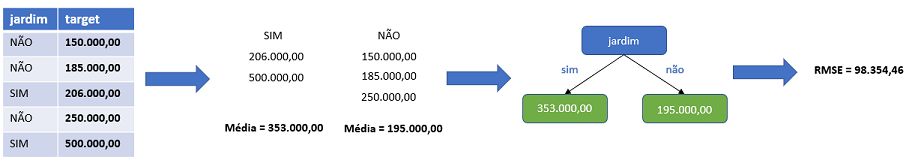

1.2 Após o calculo de erro para cada uma das features do dataset, a feature com menor erro é selecionada para ser o nó raiz

2. Após selecionarmos o nó raiz, dividimos os dados com base nessa feature e limite e então expandimos a árvore realizando os mesmos passos para cada um desses grupos agora considerando as demais features do dataset.
